In [121]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [122]:
import torch
from PIL import Image

class MyDataset(torch.utils.data.Dataset):
  'Caractérise un jeu de données pour PyTorch'
  def __init__(self, transforms = None, root_dir = 'data', mode = 'train'):
        'Initialisation'
        self.df = pd.read_json(f"{root_dir}/{mode}.jsonl", lines=True)
        self.labels = self.df.label
        self.image_names = self.df.img
        self.transforms = transforms
        self.root_dir = root_dir
#        print(len(self.labels[self.labels == 0])/len(self.labels))
      
  def __len__(self):
        "Représente le nombre total d'exemples du jeu de données"
        return len(self.labels)

  def __getitem__(self, idx):
      'Génère un exemple à partir du jeu de données'
      # Sélection de l'exemple
      if torch.is_tensor(idx):
            idx = idx.tolist()

      image_path = f"{self.root_dir}/{self.image_names.iloc[idx]}"

      img = Image.open(image_path, )

      if self.transforms :
            img = self.transforms(img)

      return img, self.labels.iloc[idx]



In [123]:
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

alpha_buster = lambda x: x[:3, :, :]

# Loading and normalizing the data.
# Define transformations for the training and test sets
transformations = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.ToTensor(),
    alpha_buster,
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 1
number_of_labels = 1



In [124]:
train_set = MyDataset(transforms=transformations)
test_set = MyDataset(transforms= transformations, mode= 'dev')

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
print("The number of images in a training set is: ", len(train_loader)*batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
print("The number of images in a test set is: ", len(test_loader)*batch_size)

The number of images in a training set is:  8500
The number of images in a test set is:  500


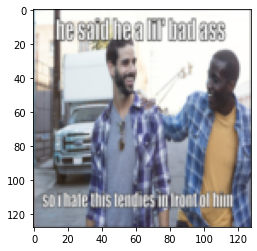

In [125]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    
    
    plt.imshow(np.transpose(img[0].numpy(), (1, 2, 0)))

def main():
    # get some random training images
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    # show images
    imshow(images)
  

if __name__ == "__main__":
    main()

In [126]:
examples = next(iter(train_loader))
for label, img  in enumerate(examples):
    print(img.shape) # [32, 3, 224, 224]


torch.Size([1, 3, 128, 128])
torch.Size([1])


In [127]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
       self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
       self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
       self.pool = nn.MaxPool2d(2, 2)
       self.fc1 = nn.Linear(16384, 64)
       self.fc2 = nn.Linear(64, 1)
       self.dropout = nn.Dropout(0.1)

   def forward(self, x):
       # add sequence of convolutional and max pooling layers
       x = self.pool(F.relu(self.conv1(x)))
       x = self.pool(F.relu(self.conv2(x)))
       x = self.pool(F.relu(self.conv3(x)))
       x = x.view(-1, 16384)
       x = self.dropout(x)
       x = F.relu(self.fc1(x))
       x = self.dropout(x)
       x = F.relu(self.fc2(x))
       x = torch.sigmoid(x)
       return x

model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


In [128]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

# Define a convolution neural network
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(80736, 1)

    def forward(self, input):
        output = F.relu(self.bn1(self.conv1(input)))      
        output = F.relu(self.bn2(self.conv2(output)))     
        output = self.pool(output)                        
        output = F.relu(self.bn4(self.conv4(output)))     
        output = F.relu(self.bn5(self.conv5(output)))
        output = output.view(-1,80736)
        output = self.fc1(output)
        output = torch.sigmoid(output)
        return output

# Instantiate a neural network model 
model1 = Network()


In [129]:
from torch.optim import Adam

 
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

In [133]:
from torch.autograd import Variable

# Function to save the model
def saveModel(mod):
    path = "./myFirstModel.pth"
    torch.save(mod.state_dict(), path)

# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy(mod):
    
    mod.eval()
    accuracy = 0.0
    total = 0.0
    i = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = mod(images)
            
            predicted = (outputs.data >= 0.5).int()
            
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
            i +=1 
            if i % 50 == 49:
                print(outputs)
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs, mod):
    best_accuracy = 0.0

    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    mod.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = mod(images)
            # compute the loss based on model output and real labels
            
            loss = loss_fn(outputs, labels.float().reshape(-1,1))
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 1000 == 999:    
                # print every 1000  
                print(f'[{epoch +1}, {i + 1}] loss: {running_loss / 1000 :.3f}')
                # zero the loss
                running_loss = 0.0

        
        # we want to save the model if the accuracy is the best
        accuracy = testAccuracy(mod)
        if accuracy > best_accuracy:
            saveModel(mod)
            best_accuracy = accuracy

        
        print(f'For epoch {epoch +1} the test accuracy over the whole test set is {accuracy} %')

In [138]:
testAccuracy(model1)

tensor([[0.5022]])
tensor([[0.5011]])
tensor([[0.5017]])
tensor([[0.5007]])
tensor([[0.5031]])
tensor([[0.5026]])
tensor([[0.5029]])
tensor([[0.5022]])
tensor([[0.5042]])
tensor([[0.5019]])


50.4

In [139]:
train(2, model1)

The model will be running on cpu device
[1, 1000] loss: 0.694
[1, 2000] loss: 0.695
[1, 3000] loss: 0.694
[1, 4000] loss: 0.695


KeyboardInterrupt: 

In [60]:
def trainAccuracy(mod):
    
    mod.eval()
    accuracy = 0.0
    total = 0.0
    
    with torch.no_grad():
        for data in train_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = mod(images)
            
            # the label with the highest energy will be our prediction
            predicted = (outputs.data >= 0.5).int()
            
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)

In [137]:
trainAccuracy(model1)

36.28235294117647

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show the images
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Function to test the model with a batch of images and show the labels predictions
def testBatch():
    # get batch of images from the test DataLoader  
    images, labels = next(iter(test_loader))

    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))
   
    # Show the real labels on the screen 
    print('Real labels: ', ' '.join('%5s' % classes[labels[j]] 
                               for j in range(batch_size)))
  
    # Let's see what if the model identifiers the  labels of those example
    outputs = model(images)
    
    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)
    
    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] 
                              for j in range(batch_size)))